In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "diabetes.csv")

In [19]:
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv", header=0)

In [21]:
# Inspect the data
print(df.shape)
print(list(df.columns))
print(df.head())

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [23]:
# Define features (X) and the target label (y)
y = df['Outcome']  # Target column
X = df.drop(columns=['Outcome'])  # All columns except the target


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [27]:
# Define a function to train and test a Decision Tree classifier
def train_test_DT(X_train, X_test, y_train, y_test, depth, crit='entropy'):
    """
    Train and test a Decision Tree Classifier.

    Parameters:
    X_train, X_test, y_train, y_test: Split datasets for training and testing
    depth: Maximum depth of the decision tree
    crit: Criterion for split ('entropy' or 'gini')

    Returns:
    acc_score: Accuracy of the model on the test set
    """
    model = DecisionTreeClassifier(criterion=crit, max_depth=depth)
    model.fit(X_train, y_train)  # Train the model
    class_label_predictions = model.predict(X_test)  # Predict on the test set
    acc_score = accuracy_score(y_test, class_label_predictions)  # Compute accuracy
    return acc_score

In [29]:
# Train multiple decision trees and evaluate their performances
max_depth_range = [3, 5, 8, 16]
accuracy_list = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print(f"Max Depth={md}, accuracy score: {score:.2f}")
    accuracy_list.append(score)

Max Depth=3, accuracy score: 0.77
Max Depth=5, accuracy score: 0.75
Max Depth=8, accuracy score: 0.76
Max Depth=16, accuracy score: 0.75


In [31]:
# Visualization function
def visualize_accuracy(hyperparam_range, acc_scores):
    """
    Visualize the accuracy of models for different hyperparameter values.

    Parameters:
    hyperparam_range: List of hyperparameter values (e.g., depths)
    acc_scores: Corresponding accuracy scores for the hyperparameter values
    """
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=hyperparam_range, y=acc_scores, marker='o')
    plt.title('Model Accuracy for Different Max Depths', fontsize=14)
    plt.xlabel('Max Depth', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.show()

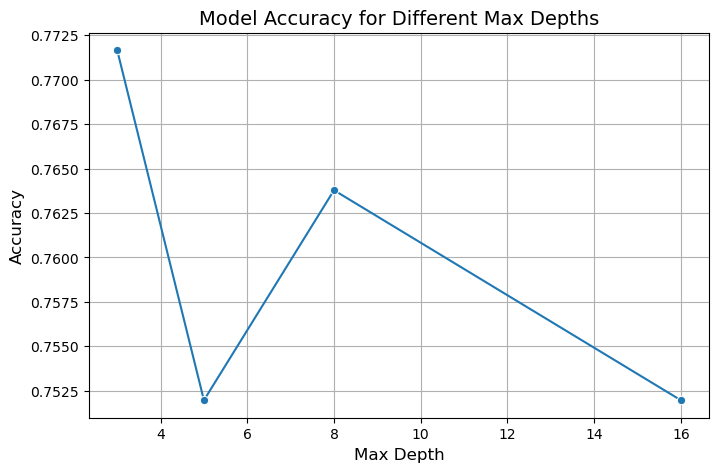

In [33]:
# Visualize results
visualize_accuracy(max_depth_range, accuracy_list)

In [35]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression

In [37]:
# Load the diabetes dataset
df = pd.read_csv("diabetes.csv", header=0)

In [39]:
# Define your label and features
# Assuming 'Outcome' is the label column (modify if it's different in your dataset)
y = df['Outcome']
# Modify this list according to your dataset's feature columns
X = df.drop(columns=['Outcome'])

In [41]:
# LogisticRegressionScratch class from the original lab
class LogisticRegressionScratch(object):
    def __init__(self, tolerance=10**-8, max_iterations=20):
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.weights_array = None  # holds current weights and intercept
        self.prior_w = None  # holds previous weights and intercept
        self.weights = None
        self.intercept = None

    def predict_proba(self, X):
        '''Compute probabilities using the inverse logit'''
        XW = X.dot(self.weights_array)
        P = (1 + np.exp(-1 * XW)) ** -1
        return P

    def compute_gradient(self, X, Y, P):
        '''Computes the gradient vector'''
        G = -1 * (Y - P).dot(X)
        return G

    def compute_hessian(self, X, P):
        '''Computes the Hessian matrix'''
        Q = P * (1 - P)
        XQ = X.T * Q
        H = XQ.dot(X)
        return H

    def update_weights(self, X, y):
        '''Updates existing weight vector'''
        P = self.predict_proba(X)
        G = self.compute_gradient(X, y, P)
        H = self.compute_hessian(X, P)
        self.prior_w = self.weights_array
        self.weights_array = self.weights_array - np.linalg.inv(H).dot(G)

    def check_stop(self):
        '''Check stopping criteria based on weight convergence'''
        w_old_norm = self.prior_w / np.linalg.norm(self.prior_w)
        w_new_norm = self.weights_array / np.linalg.norm(self.weights_array)
        diff = w_new_norm - w_old_norm
        distance = np.sqrt(diff.dot(diff))
        stop = (distance < self.tolerance)
        return stop

    def fit(self, X, y):
        '''Fit the logistic regression model'''
        self.weights_array = np.zeros(X.shape[1] + 1)
        self.weights_array[-1] = np.log(y.mean() / (1 - y.mean()))
        X_int = np.hstack((X, np.ones((X.shape[0], 1))))

        for i in range(self.max_iterations):
            self.update_weights(X_int, y)
            if self.check_stop():
                self.set_final_weights()
                self.set_final_intercept()
                break

    def set_final_weights(self):
        self.weights = self.weights_array[0:-1]

    def set_final_intercept(self):
        self.intercept = self.weights_array[-1]

    def get_weights(self):
        return self.weights

    def get_intercept(self):
        return self.intercept

In [43]:
# Instantiate and fit the logistic regression model
lr = LogisticRegressionScratch()
lr.fit(X, y)

In [45]:
# Print the fitted weights and intercept
print('The fitted weights and intercept are:')
print(lr.get_weights(), lr.get_intercept())

The fitted weights and intercept are:
[ 1.23182298e-01  3.51637146e-02 -1.32955469e-02  6.18964365e-04
 -1.19169898e-03  8.97009700e-02  9.45179741e-01  1.48690047e-02] -8.404696366914138


In [ ]:
#For kaelan and Jessica model evaluation

# Evaluate the model on the validation set
val_accuracy = middle_math_multiclass_model.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

# Optionally, you can evaluate with other metrics like precision, recall, or confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the validation set
y_val_pred = middle_math_multiclass_model.predict(X_val)

# Print additional evaluation metrics for validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix for Validation Set
print("Confusion Matrix for Validation Set:")
print(confusion_matrix(y_val, y_val_pred))

# Evaluate the model on the test set
test_accuracy = middle_math_multiclass_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Predictions on the test set
y_test_pred = middle_math_multiclass_model.predict(X_test)

# Print additional evaluation metrics for test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
print("Confusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_test_pred))


In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [49]:
df = pd.read_csv("diabetes.csv",header=0)

In [51]:
# Define the label and features
y = df['Outcome']
X = df.drop(columns=['Outcome'])

In [53]:
# Logistic Regression Class from scratch
class LogisticRegressionScratch(object):
    def __init__(self, tolerance=10**-8, max_iterations=20):
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.weights_array = None  # holds current weights and intercept (intercept is at the last position)
        self.prior_w = None  # holds previous weights and intercept (intercept is at the last position)
        self.weights = None  # final weights after training
        self.intercept = None  # final intercept after training

    def predict_proba(self, X):
        """
        Compute probabilities using the inverse logit
        - Inputs: The Nx(K+1) matrix with intercept column X
        - Outputs: Vector of probabilities of length N
        """
        XW = X.dot(self.weights_array)
        P = (1 + np.exp(-1 * XW)) ** -1
        return P

    def compute_gradient(self, X, Y, P):
        """
        Computes the gradient vector
        - Inputs: The Nx(K+1) matrix with intercept column X, Nx1 vector y (label), Nx1 vector of predictions P
        - Outputs: 1x(K+1) vector of gradients
        """
        G = -1 * (Y - P).dot(X)
        return G

    def compute_hessian(self, X, P):
        """
        Computes the Hessian matrix
        - Inputs: Nx(K+1) matrix X, Nx1 vector of predictions P
        - Outputs: KxK Hessian matrix H=X^T * Diag(Q) * X
        """
        Q = P * (1 - P)
        XQ = X.T * Q
        H = XQ.dot(X)
        return H

    def update_weights(self, X, y):
        """
        Updates existing weight vector
        - Inputs: Nx(Kx1) matrix X, Nx1 vector y
        - Calls predict_proba, compute_gradient and compute_hessian and uses the return values to update the weights array
        """
        P = self.predict_proba(X)
        G = self.compute_gradient(X, y, P)
        H = self.compute_hessian(X, P)

        self.prior_w = self.weights_array  # save current weights
        self.weights_array = self.weights_array - np.linalg.inv(H).dot(G)  # update weights

    def check_stop(self):
        """
        Check to see if Euclidean distance between old and new weights (normalized) is less than the tolerance
        """
        w_old_norm = self.prior_w / np.linalg.norm(self.prior_w)
        w_new_norm = self.weights_array / np.linalg.norm(self.weights_array)

        diff = w_new_norm - w_old_norm
        distance = np.sqrt(diff.dot(diff))
        stop = (distance < self.tolerance)
        return stop

    def fit(self, X, y):
        """
        X is the Nx(K-1) data matrix
        Y is the labels, using {0,1} coding
        """
        # Set initial weights - add an extra dimension for the intercept
        self.weights_array = np.zeros(X.shape[1] + 1)

        # Initialize the slope parameter to log(base rate / (1 - base rate))
        self.weights_array[-1] = np.log(y.mean() / (1 - y.mean()))

        # Create a new X matrix that includes a column of ones for the intercept
        X_int = np.hstack((X, np.ones((X.shape[0], 1))))

        # Perform gradient descent
        for i in range(self.max_iterations):
            self.update_weights(X_int, y)
            # Check whether we should stop
            if self.check_stop():
                # Since we are stopping, let's save the final weights and intercept
                self.set_final_weights()
                self.set_final_intercept()
                break

    def set_final_weights(self):
        self.weights = self.weights_array[0:-1]

    def set_final_intercept(self):
        self.intercept = self.weights_array[-1]

    def get_weights(self):
        return self.weights

    def get_intercept(self):
        return self.intercept

In [55]:
# Step 3: Train the Logistic Regression Model
lr = LogisticRegressionScratch()
lr.fit(X, y)


In [57]:
# Print the fitted weights and intercept
print('The fitted weights and intercept are:')
print(lr.get_weights(), lr.get_intercept())

The fitted weights and intercept are:
[ 1.23182298e-01  3.51637146e-02 -1.32955469e-02  6.18964365e-04
 -1.19169898e-03  8.97009700e-02  9.45179741e-01  1.48690047e-02] -8.404696366914138


In [73]:
# 5. Log-Loss
log_loss_value = log_loss(y, y_pred_proba)
print(f'Log-Loss: {log_loss_value}')

NameError: name 'y_pred_proba' is not defined

In [96]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [100]:
# L2 regularization (Ridge)
model = LogisticRegression(C=1, penalty='l2')

# L1 regularization (Lasso)
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')
